
# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The main purpose of the project is to investigate why patients do not show up for appointments and determine what factors is important for predicting whether or not patients show up for their appointment.

>The dataset contains information on 100k medical appointments in Brazil. This dataset is available on kaggle.
The dataset includes 14 variables. They are described below:
>1. PatientId -: Uniquely identifies the patient
>2. AppointmentID -: Uniquely identifies the patient appointment
>3. Gender -: Describes if patient is Male (M) or Female (F)
>4. ScheduledDay -: Day the appointment is scheduled
>5. AppointmentDay -: Actual day of appoinment
>6. Age -: Patient age
>7. Neighbourhood -: Location of Appoinment hospital
>8. Scholarship -: It indicates whether the patient is enrolled in the Brasilian welfare program or not
>9. Hypertension -: It indicates whether the patient suffers from hypertension or not
>10. Diabetes -: It indicates whether the patient suffers from diabetes or not
>11. Alcoholism -: It indicates whether the patient is an alcoholic or not      
>12. Handicap -: It indicates if the patient has a physical impairment or not
>13. SMS_received -: It indicates if the patient received an SMS or not.
>14. No-show  -: Target Variable. 'Yes' if the patient didn't show up, and 'No' if the patient show up.

> Questions
>1. What percentage of patients attended their appointments
>2. Does receiving sms have an impact on attendance or not
>3. Which variables are related to whether a patient's shows up or not
>4. Does gender have an impact on attendance or not
>5. What is the most visited place


In [1]:
#Importing the packages and libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:

#Load the no show appointment data
df = pd.read_csv('noshowappointment.csv')


In [3]:
#Inspecting the data
df.head()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [32]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### Observations
>1. It can be noticed that the range of the data is ok. The 'Age' column has some discrepancies where the minimum age is negative. This should be removed
>2. Also the max value in Handcap is 4, which is a discrepancy since the field should only contain 0 or 1
>3. 50% of Patients are 37 years and below.
>4. The majority of patients do not have hypertension,diabetes and are not alcoholic and handicap.
>5. The majority of patients did not receive SMSs and are not enrolled in the welfare program

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Observations
> The AppointmentDay and ScheduledDay has to be converted to Date data type


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### Observations
> It can be noticed that some variables have spelling mistakes, this will have to be changed.
Also No-show needs to change to be consistent with sms_received.


In [6]:
#Checking for duplicates in the data
sum(df.duplicated())

0

>There are no duplicates

#### Visualization
>In this session, the diferent variables will be visualised to have an idea of the distributions



array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

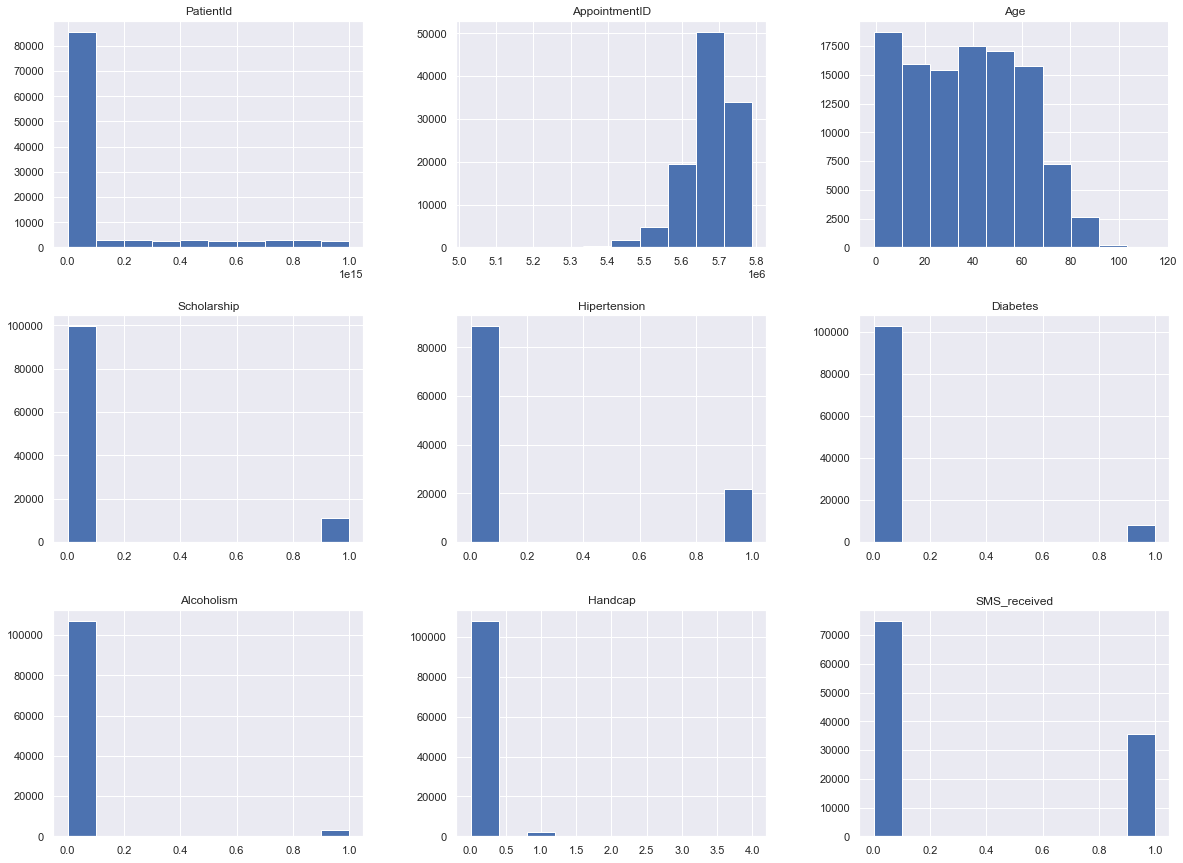

In [7]:
df.hist(figsize = (20,15))

In [8]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
female = df['Gender'].value_counts()[0]
male = df['Gender'].value_counts()[1]

print('{} Male patients and {} Female patients'.format(male,female))

38687 Male patients and 71840 Female patients


In [11]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

### Observations from the graph above
> - Most patients were within 15 years or younger. The number reduced from 60 years
> - Also the female patients are more than the male patients




### Data Cleaning 
> In this section, we'd clean the dataset. This involves correcting wrong column names, verifying and changing data types,etc.


### Checking inconsistency in Age column

In [12]:
df[df['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> Since it's one row, we can drop it from the dataset

In [13]:
df.drop(df[df.Age==-1].index[0], inplace=True)


### Rename Columns with wrong spelling

In [14]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)

In [15]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [16]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> There's no need for patient id and appointment id for analysis, so we will drop them

In [17]:
#drop columns from dataset
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

#Check to confirm if changes have been made
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Change Data Type

In [18]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)


> Check the dataset to see the change

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hypertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handicap        110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


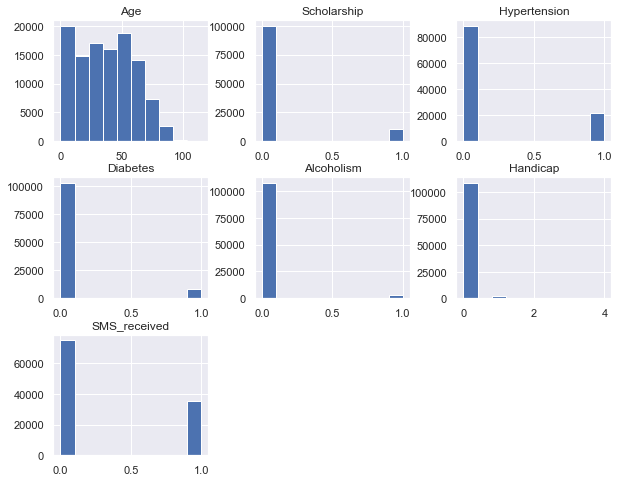

In [20]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 

>What is the percentage of patients who attend their appointments?

In [21]:
##Changing the No_show responses to integers (Yes = 1,No = 0)
df['No_show'].replace({'Yes':1,'No':0},inplace=True)
df['No_show'] = df['No_show'].astype('int64')
df['No_show'].head()

0    0
1    0
2    0
3    0
4    0
Name: No_show, dtype: int64

In [22]:
Not_Attend = df[df['No_show'] == 0].count()['No_show']
Attend = df[df['No_show'] == 1].count()['No_show']

In [23]:
print('Number of Patients who attended the appointment : ',Attend,
     '\nNumber of Patients who didnt attend the appointment : ',Not_Attend)


Number of Patients who attended the appointment :  22319 
Number of Patients who didnt attend the appointment :  88207


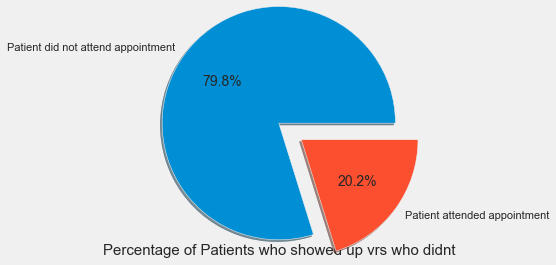

In [24]:
d = [Not_Attend,Attend]
label = ['Patient did not attend appointment','Patient attended appointment']

plt.style.use('fivethirtyeight')
plt.axis('equal')
plt.pie(d,labels=label,radius = 1.25, shadow = True, explode=(0,0.3),
       autopct='%1.1f%%')
plt.xlabel('Percentage of Patients who showed up vrs who didnt' , fontsize=15)
plt.show()

### Research Question 2 

> Does receiving sms have an impact on attendance or not?

In [25]:
df.groupby('SMS_received').No_show.value_counts(normalize=True)

SMS_received  No_show
0             0          0.832965
              1          0.167035
1             0          0.724255
              1          0.275745
Name: No_show, dtype: float64

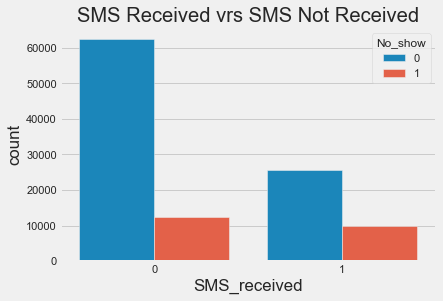

In [26]:
sns.countplot(x=df['SMS_received'], hue=df['No_show']);
plt.title('SMS Received vrs SMS Not Received');

> It could be seen though the majority number of patients didnt received the sms, it didnt really have a significant effect on the attendance.

### Research Question 3  

> How are the variables correlated to each other
> How are the variables related to whether a patient will show up or not.

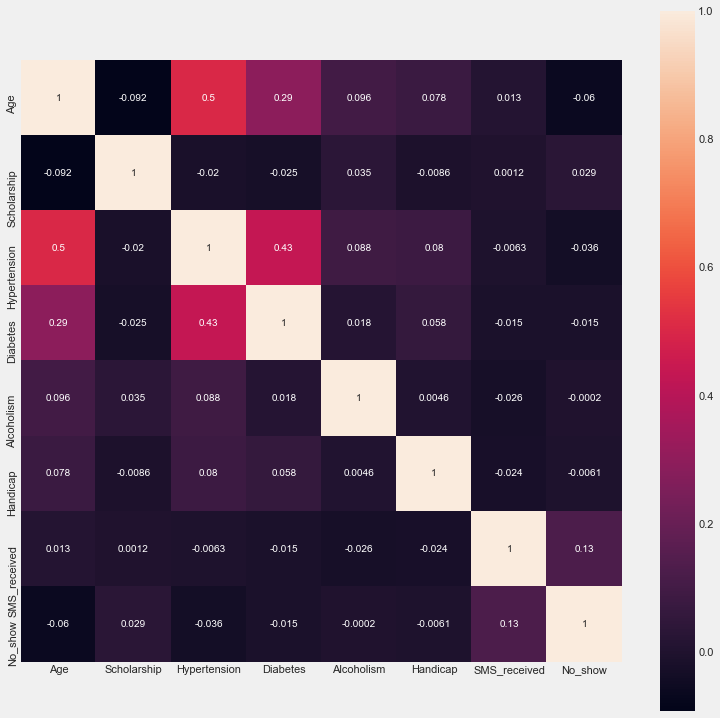

In [27]:
corrMatrix = df.corr()
fig, axes = plt.subplots(figsize=(12,12))
sns.heatmap(corrMatrix, annot=True, vmax=1, cbar=True, square=True,  annot_kws={'size': 10})
plt.show()



### Research Question 4   

> Relation between Gender and attendance

In [28]:
df1=df.groupby(['Gender','No_show']).count()
df1.head()

ScheduledDay  AppointmentDay    Age  Neighbourhood  \
Gender No_show                                                       
F      0               57245           57245  57245          57245   
       1               14594           14594  14594          14594   
M      0               30962           30962  30962          30962   
       1                7725            7725   7725           7725   

                Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  \
Gender No_show                                                              
F      0              57245         57245     57245       57245     57245   
       1              14594         14594     14594       14594     14594   
M      0              30962         30962     30962       30962     30962   
       1               7725          7725      7725        7725      7725   

                SMS_received  
Gender No_show                
F      0               57245  
       1               14594  
M      0               30962  
       1                7725

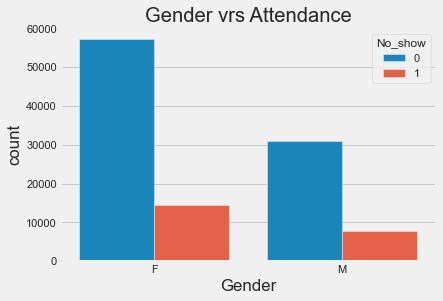

In [29]:
sns.countplot(x=df['Gender'], hue=df['No_show']);
plt.title('Gender vrs Attendance');

### Research Question 5   

> Does scholarship status affect attendance?

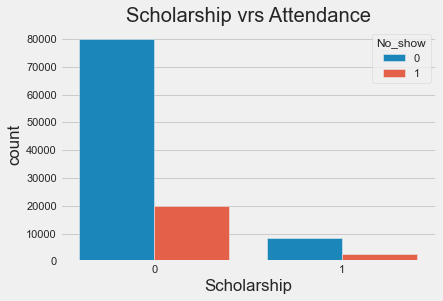

In [30]:
sns.countplot(x=df['Scholarship'], hue=df['No_show']);
plt.title('Scholarship vrs Attendance');

### Research Question 6  
>  Does the location affect attendance?

<AxesSubplot:xlabel='Neighbourhood'>

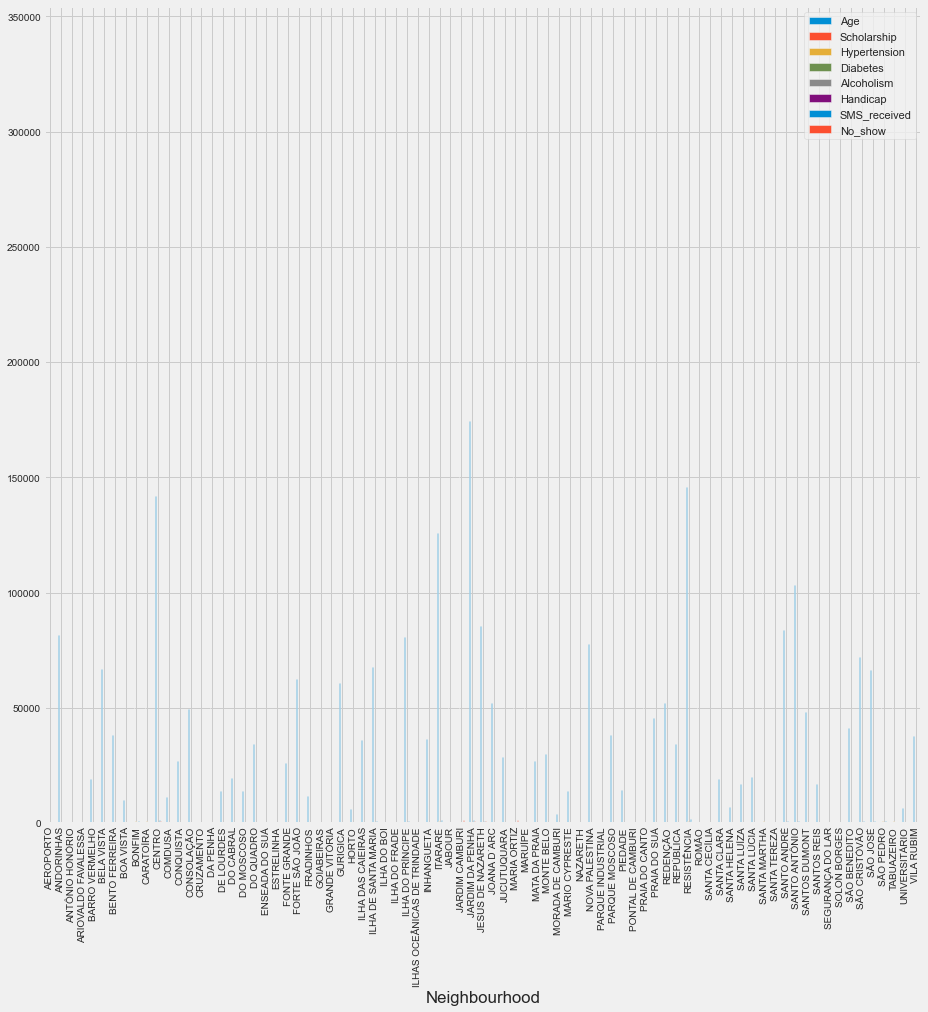

In [31]:
df.groupby(['Neighbourhood']).sum().plot(kind='bar',figsize=(14,14),fontsize=10)
#plt.figure(figsize=(8,5))
#sns.barplot(x ='Neighbourhood', y ='No_show', palette='rainbow', data = df)

<a id='conclusions'></a>
## Conclusions

> - The Percentage of Patients who did not show constitute 20.19%
> - The Percentage of Patients who showed up constitute 79.81%
> - Though the majority of Patients did not receive the sms, it didnt really have a significant effect on the attendance
> - Though (Age,hypertension and diabetes) have a correlation, there isn't a strong correlation between the features
> - The number of female patients is more than the male patients, also the percentage of gender who showed up and not show up is similar.
> - The most visited place is Jardim Da Penha
